In [5]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest as ztest
from scipy.stats.stats import pearsonr
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [8]:
# cau 1
thietbi = pd.read_csv('thietbi.csv')
nguoidung_thietbi = pd.read_csv('nguoidung_thietbi.csv')
nguoidung_sudung = pd.read_csv('nguoidung_sudung.csv')

thietbi.head(10)
nguoidung_thietbi.head(10)
nguoidung_sudung.head(10)

,Retail Branding,Marketing Name,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A
5,7Eleven,IN265,IN265,IN265
6,A.O.I. ELECTRONICS FACTORY,A.O.I.,TR10CS1_11,TR10CS1
7,AG Mobile,AG BOOST 2,BOOST2,E4010
8,AG Mobile,AG Flair,AG_Flair,Flair
9,AG Mobile,AG Go Tab Access 2,AG_Go_Tab_Access_2,AG_Go_Tab_Access_2


In [9]:
#cau 3
thietbi.rename(columns={'Retail Branding': 'Branding', 'Marketing Name': 'MarketingName'}, inplace=True)

thietbi.columns

Index(['Branding', 'MarketingName', 'Device', 'Model'], dtype='object')

In [10]:
# cau 4
dfKetQua = pd.merge(nguoidung_sudung, nguoidung_thietbi[['use_id', 'platform', 'device']], on='use_id')

dfKetQua.head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F


In [14]:
# cau 5
dfKetQua = pd.merge(dfKetQua, thietbi[['Branding', 'Model']], 
left_on='device', right_on='Model')

# cau 6
dfKetQua.head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Branding,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505
1,69.80,14.70,25955.55,22801,android,GT-I9505,Samsung,GT-I9505
2,249.26,253.22,1557.33,22875,android,GT-I9505,Samsung,GT-I9505
3,249.26,253.22,1557.33,22876,android,GT-I9505,Samsung,GT-I9505
4,83.46,114.06,3114.67,22880,android,GT-I9505,Samsung,GT-I9505


In [15]:
# cau 7
dfKetQua.groupby('Branding').agg({
    'outgoing_mins_per_month': 'mean',
    'outgoing_sms_per_month': 'mean',
    'monthly_mb': 'mean',
    'use_id': 'count'
})

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
Branding,,,,
HTC,299.842955,93.059318,5144.077955,44
Huawei,81.526667,9.500000,1561.226667,3
LGE,111.530000,12.760000,1557.330000,2
Lava,60.650000,261.900000,12458.670000,2
Lenovo,215.920000,12.930000,1557.330000,2
Motorola,95.127500,65.666250,3946.500000,16
OnePlus,354.855000,48.330000,6575.410000,6
Samsung,191.010093,92.390463,4017.318889,108
Sony,177.315625,40.176250,3212.000625,16


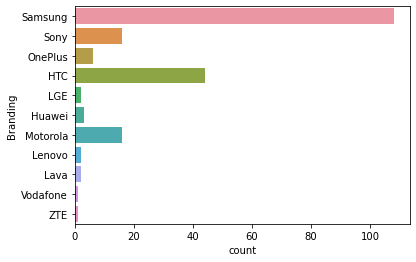

In [16]:
# cau 8
import seaborn as sns 

sns.countplot(y='Branding', data=dfKetQua)
plt.show()

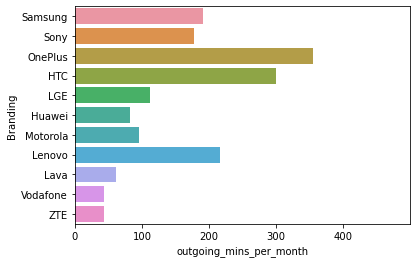

In [18]:
# cau 9
sns.barplot(x='outgoing_mins_per_month', y='Branding', data=dfKetQua, errwidth=0)
plt.show()

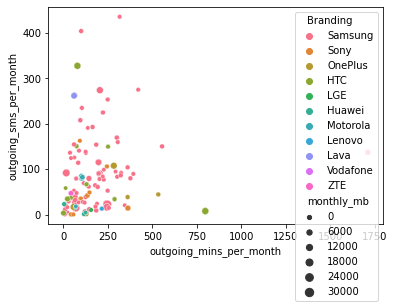

In [27]:
# cau 10
sns.scatterplot(x='outgoing_mins_per_month', y='outgoing_sms_per_month', data=dfKetQua, hue='Branding', size='monthly_mb')
plt.show()

In [24]:
# cau 11
# H0: trung binh outgoing_mins_per_month co bang 200 hay khong
ztest(dfKetQua['outgoing_mins_per_month'], value=200)

# pvalue = 0.7129981730830808 > alpha = 0.05 -> chap nhan H0 
# ket luan: trung binh outgoing_mins_per_month co bang 200

(0.3678324474067914, 0.7129981730830808)

In [25]:
# cau 12
# H0: trung binh outgoing_sms_per_month co bang 100 hay khong
ztest(dfKetQua['outgoing_sms_per_month'], value=100)

# pvalue = 0.003109418467062032 < alpha = 0.05 -> bac bo H0 
# ket luan: khong du du kien de ket luan trung binh outgoing_sms_per_month bang 100

(-2.956708578196125, 0.003109418467062032)

In [28]:
# cau 13
# H0: trung binh monthly_mb co bang 2048mb hay khong
ztest(dfKetQua['monthly_mb'], value=2048)

# pvalue = 3.257248511198895e-09 < alpha = 0.05 -> bac bo H0
# ket luan: khong du du kien de ket luan trung binh monthly_mb bang 2048mb 

(5.918078326415771, 3.257248511198895e-09)

In [54]:
# cau 14
correlation_matrix = dfKetQua[['outgoing_mins_per_month', 'outgoing_sms_per_month', 'monthly_mb']].corr()

# Chuyển ma trận tương quan thành DataFrame và loại bỏ các giá trị tương quan với chính nó
correlation_df = correlation_matrix.unstack().reset_index()
correlation_df.columns = ['Gia tri 1', 'Gia tri 2', 'Muc do tuong quan']
correlation_df = correlation_df[correlation_df['Gia tri 1'] != correlation_df['Gia tri 2']]

# Sắp xếp các giá trị tương quan từ thấp đến cao
sorted_correlation_df = correlation_df.sort_values(by='Muc do tuong quan')

print(sorted_correlation_df)

                 Gia tri 1                Gia tri 2  Muc do tuong quan
5   outgoing_sms_per_month               monthly_mb          -0.046049
7               monthly_mb   outgoing_sms_per_month          -0.046049
1  outgoing_mins_per_month   outgoing_sms_per_month          -0.016494
3   outgoing_sms_per_month  outgoing_mins_per_month          -0.016494
2  outgoing_mins_per_month               monthly_mb           0.213489
6               monthly_mb  outgoing_mins_per_month           0.213489


In [29]:
# cau 15
# kiem dinh outgoing_mins_per_month va outgoing_sms_per_month co tuong quan hay khong

#H0: outgoing_mins_per_month va outgoing_sms_per_month co tuong quan
pearsonr(dfKetQua['outgoing_mins_per_month'], dfKetQua['outgoing_sms_per_month'])

# pvalue = 0.8162223636414832 > alpha -> chap nhan H0 -> outgoing_sms_per_month co tuong quan voi outgoing_mins_per_month

(-0.016494441685319394, 0.8162223636414832)

In [41]:
# cau 16
# platform va branding co quan he khong
# H0: khong co quan he, 2 bien doc lap

crosdata = pd.crosstab(dfKetQua['platform'], [dfKetQua['Branding']], rownames=['Platform'], colnames=['Branding'])

stat, p , dof, expected = chi2_contingency(crosdata)
alpha = 0.05
print('p value: ' + str(p))
if p <= alpha:
    print('Bac bo H0 -> co phu thuoc')
else:
    print('Chap nhan H0 -> khong phu thuoc')

p value: 1.0
Chap nhan H0 -> khong phu thuoc


In [42]:
# cau 17
# monthly_mb va platform co quan he khong
# H0: khong co quan he, 2 bien doc lap

crosdata = pd.crosstab(dfKetQua['platform'], [dfKetQua['monthly_mb']], rownames=['Platform'], colnames=['Monthly_mb'])

stat, p , dof, expected = chi2_contingency(crosdata)
alpha = 0.05
print('p value: ' + str(p))
if p <= alpha:
    print('Bac bo H0 -> co phu thuoc')
else:
    print('Chap nhan H0 -> khong phu thuoc')

p value: 1.0
Chap nhan H0 -> khong phu thuoc


In [45]:
# cau 18
# monthly_mb va platform co quan he theo loai branding khong 

model = ols('platform ~ monthly_mb + Branding + monthly_mb:Branding', data=dfKetQua).fit()
result = sm.stats.anova_lm(model, type=2)
result

# platform khong phu thuoc vao Branding
# platform khong phu thuoc vao monthly_mb
# ket luan: platform khong phu thuoc vao monthly_mb theo tung loai branding


,df,sum_sq,mean_sq,F,PR(>F)
Branding,10.0,1.454488e-28,1.454488e-29,0.015920,1.000000
monthly_mb,1.0,3.364626e-30,3.364626e-30,0.003683,0.951676
monthly_mb:Branding,10.0,7.278202e-30,7.278202e-31,0.000797,1.000000
Residual,184.0,1.681108e-25,9.136457e-28,NaN,NaN


In [46]:
# cau 19
# phan tich su anh huong cua outgoing_mins_per_month, outgoing_sms_per_month den monthly_mb bang mo hinh hoi quy tuyen tinh
x_with_constant = sm.add_constant(dfKetQua[['outgoing_mins_per_month', 'outgoing_sms_per_month']].values)
y = dfKetQua['monthly_mb'].values
result = sm.OLS(y, x_with_constant).fit()
print(result.summary())

# monthly_mb = 3513.0441 + 4.8782 * outgoing_mins_per_month - 2.85 * outgoing_sms_per_month

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     4.925
Date:                Sat, 07 Sep 2024   Prob (F-statistic):            0.00818
Time:                        16:20:09   Log-Likelihood:                -2005.3
No. Observations:                 201   AIC:                             4017.
Df Residuals:                     198   BIC:                             4027.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3513.0441    631.350      5.564      0.0

In [49]:
# cau 20
# outgoing_mins_per_month = 50
# outgoing_sms_per_month = 75
# thi monthly_mb = ?

print(3513.0441 + 4.8782 * 50 - 2.85 * 75)

outgoing_mins_per_month_input = int(input('Nhap outgoing_mins_per_month: '))
outgoing_sms_per_month_input = int(input('Nhap outgoing_sms_per_month: '))
print('Monthly_mb la: ' + str(3513.0441 + 4.8782 * outgoing_mins_per_month_input - 2.85 * outgoing_sms_per_month_input))

3543.2041
Monthly_mb la: 3573.3641
